# Hypothesis and Recommendations for Company Growth

**Case Study of 12Go** 

We have gathered booking data for 2019 and 2023 in this table. These are not full years, but
Q1/Q2/Q3 for both years.

Analysis achieved by: Adnan Abed

Address: Warsaw, Poland
Email: adn.abed@gamil.com
Tel.: +48 730 726 134
Date of submission: 20/07/2023

We have gathered booking data for 2019 and 2023 in this table. These are not full years, but Q1/Q2/Q3 for both years.

## Objective

The main goals of the assessment are to find what has changed and why and provide
hypotheses/recommendations for future growth- 
-  Investigate what happened with the metric “EPS” (Earn Per Seat). Was there any change in EPS between these two years, and if it is, why?
-  Based on the data, try to make at least 3 more hypotheses/recommendations about increasing sales/revenue and ranking them by business value.

## Data Analysis
### Data Description

- The data set includes 2846263 records and  52 columns
- No duplicates (Bid is a primary key).
- Essential number of Null values in the column paidon_date (680356 rows), we have to exclude these rows when considering calculation based on date. 
- The columns (paygate_code, seller_name,class_name, vehclass_id, status_id, and channel) are all with empty cells. Trip_key has 1035143 empty values. 

### Data Exploration Analysis DEA
Let’s calculate the Earn per Seat for years 2019 and 2023 to see the development.3.


```SQL

SELECT 
    EXTRACT(YEAR FROM paidon_date) AS Year,
    Round(SUM(total_usd), 2) AS t_total_usd,
    Round(SUM(seats), 2) AS total_seats,
    Round(SUM(total_usd) / SUM(seats), 2) AS eps
FROM 
    analytic_test_booking
WHERE
    EXTRACT(YEAR FROM paidon_date) IS NOT NULL
GROUP BY 
    EXTRACT(YEAR FROM paidon_date)
ORDER BY 
    Year;
 
    Year;

```

| Year | total_usd      | total_seats | eps                 |
|------|----------------|-------------|---------------------|
| 2019 | 16857805.94 | 987923      | 17.06  |
| 2023 | 40853409.64  | 3139188     | 13.01  |


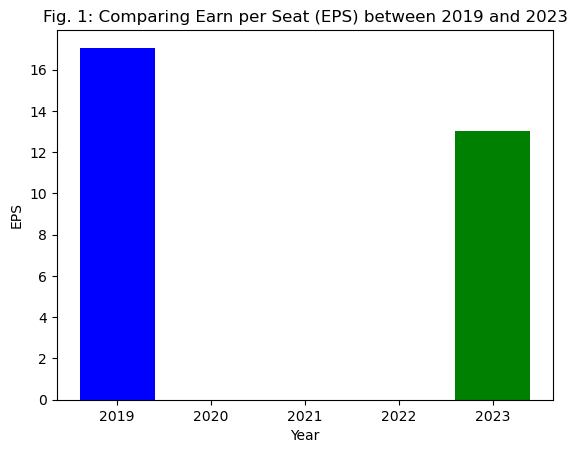

In [16]:
import matplotlib.pyplot as plt

# Data
years = [2019, 2023]
eps_values = [17.06, 13.01]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot data
ax.bar(years, eps_values, color=['blue', 'green'])

# Set the title and labels
ax.set_title('Fig. 1: Comparing Earn per Seat (EPS) between 2019 and 2023')
ax.set_xlabel('Year')
ax.set_ylabel('EPS')

# Display the plot
plt.show()

The EPS for 2023 is lower than that of 2019. Let's analyze the reasons why.

### Why did EPS drop? 
To determine which factor led to the decrease in earnings per seat (eps) from 2019 to 2023, we can analyze the growth rates of total_usd and seats during this period. If the total_usd increased slower than the seats, it could have contributed to the decrease in eps. Let's test this hypothesis.

Table 2: The growth in Revenue and seat demand


```sql

WITH YearlyData AS (
    SELECT 
        EXTRACT(YEAR FROM paidon_date) AS Year,
        SUM(total_usd) AS t_total_usd,
        SUM(seats) AS total_seats
    FROM 
        analytic_test_booking
    WHERE
    EXTRACT(YEAR FROM paidon_date) IS NOT NULL
    GROUP BY 
        EXTRACT(YEAR FROM paidon_date)
),
GrowthRates AS (
    SELECT 
        Year,
        t_total_usd,
        total_seats,
        LAG(t_total_usd) OVER (ORDER BY Year) AS prev_total_usd,
        LAG(total_seats) OVER (ORDER BY Year) AS prev_total_seats
    FROM 
        YearlyData
)
SELECT 
    Year,
    t_total_usd,
    total_seats,
    (t_total_usd - prev_total_usd) / prev_total_usd * 100 AS total_usd_growth_rate,
    (total_seats - prev_total_seats) / prev_total_seats * 100 AS total_seats_growth_rate,
    t_total_usd / total_seats AS eps
FROM 
    GrowthRates
ORDER BY 
    Year;
```

| Year | t_total_usd       | total_seats | total_usd_growth_rate | total_seats_growth_rate | eps                 |
|------|-------------------|-------------|-----------------------|-------------------------|---------------------|
| 2019 | 16857805.96 | 987923      | NULL                  | NULL                    | 17.94  |
| 2023 | 40853409527  | 3139188     | 14254    | 21.563                | 13049  |


As expected the sum of total_usd grew at a slower rate than the sum of seats causing the drop in EPS for 2023. Next step we will focus on the drop in revenue rather than the growth in demand (Seats).
### Deep Dive into the Revenue Analysis
The observation that the growth in total seats is higher than the growth in total earnings can be attributed to several potential reasons. Here are some possible explanations:


#### Hypothesis:
- Price Analysis:
    - Analyse the average price per seat over the years to see if prices have dropped significantly.
- Revenue Segmentation:
    - Break down the total earnings by product or service categories to identify if certain segments have experienced a decline in average revenue per seat.
- Promotional Impact:
    - Examine the impact of promotions, discounts, and other pricing strategies over time.
- Customer Demographics and Preferences:
    - Study changes in customer demographics and preferences to understand if there is a shift towards cheaper or different types of services.
##### Price Analysis:
Let’s analyse EPS and the average price per seat over the two years to see if prices have dropped significantly.


```sql
SELECT 
    year,
    quarter,
    AVG(eps) AS avg_eps
FROM (
    SELECT
        EXTRACT(YEAR FROM paidon_date) AS year,
        EXTRACT(QUARTER FROM paidon_date) AS quarter,
        total_usd / seats AS eps
    FROM 
        analytic_test_booking
    WHERE
        EXTRACT(YEAR FROM paidon_date) IS NOT NULL
) AS subquery
WHERE
    quarter IN (1, 2, 3)
GROUP BY 
    year,
    quarter
ORDER BY 
    year,
    quarter;
```

Table 3: Comparing Average EPS between 2019 and 2023

| year | quarter | avg_eps |
| ---- | ------- | ------- |
| 2019 | 1       | 17.24   |
| 2019 | 2       | 16.91   |
| 2019 | 3       | 17.90   |
| 2023 | 1       | 13.80   |
| 2023 | 2       | 12.95   |
| 2023 | 3       | 12.55   |


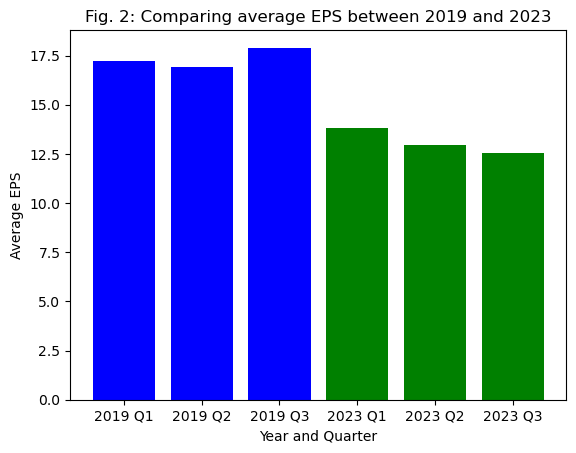

In [25]:
import matplotlib.pyplot as plt

# Data
years_quarters = ['2019 Q1', '2019 Q2', '2019 Q3', '2023 Q1', '2023 Q2', '2023 Q3']
avg_eps_values = [17.24, 16.91, 17.90, 13.80, 12.95, 12.55]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot data
ax.bar(years_quarters, avg_eps_values, color=['blue', 'blue', 'blue', 'green', 'green', 'green'])

# Set the title and labels
ax.set_title('Fig. 2: Comparing average EPS between 2019 and 2023')
ax.set_xlabel('Year and Quarter')
ax.set_ylabel('Average EPS')

# Display the plot
plt.show()


```sql
SELECT 
    YEAR(paidon_date) AS year,
    QUARTER(paidon_date) AS quarter,
    ROUND(AVG(netprice_usd), 2) AS average_netprice_usd
FROM 
    analytic_test_booking
WHERE 
    YEAR(paidon_date) IN (2019, 2023) 
    AND QUARTER(paidon_date) IN (1, 2, 3)
    AND YEAR(paidon_date) IS NOT NULL
GROUP BY 
    YEAR(paidon_date), 
    QUARTER(paidon_date)
ORDER BY 
    YEAR(paidon_date), 
    QUARTER(paidon_date);


```


Table 4: Comparing the average quarterly NetPrice between 2019 and 2023. 

| year | quarter | average_netprice_usd |
| ---- | ------- | -------------------- |
| 2019 | 1       | 14.00                |
| 2019 | 2       | 13.71                |
| 2019 | 3       | 14.52                |
| 2023 | 1       | 11.45                |
| 2023 | 2       | 10.72                |
| 2023 | 3       | 10.32                |

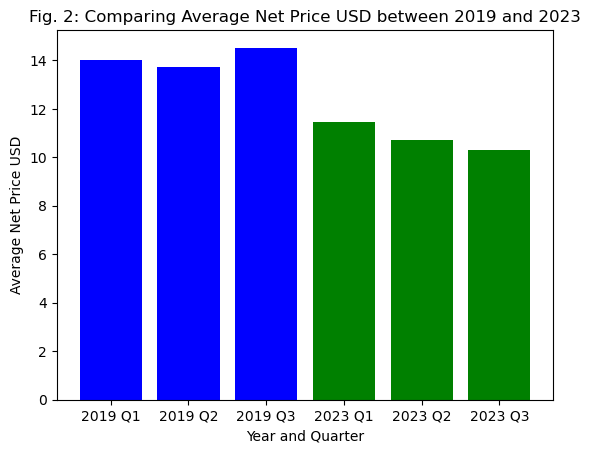

In [32]:
import matplotlib.pyplot as plt

# Data
years_quarters = ['2019 Q1', '2019 Q2', '2019 Q3', '2023 Q1', '2023 Q2', '2023 Q3']
average_netprice_usd = [14.00, 13.71, 14.52, 11.45, 10.72, 10.32]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot data
ax.bar(years_quarters, average_netprice_usd, color=['blue', 'blue', 'blue', 'green', 'green', 'green'])

# Set the title and labels
ax.set_title('Fig. 2: Comparing Average Net Price USD between 2019 and 2023')
ax.set_xlabel('Year and Quarter')
ax.set_ylabel('Average Net Price USD')

# Display the plot
plt.show()


The drop in average EPS was associated with a drop in average Net prices between the two years. 


##### Revenue Segmentation:
Break down the total earnings by product or service categories to identify if certain segments have experienced a decline in average revenue per seat. Though we don’t have a lot of data showing the different offerings, we will analyse the available data based on the Class_id.


- **Revenue Segmentation:**
  - Break down the total earnings by product or service categories to identify if certain segments have experienced a decline in average revenue per seat.

``` SQL
WITH avg_eps AS (
    SELECT 
        class_id,
        ROUND(AVG(CASE WHEN year = 2019 THEN eps END), 2) AS avg_eps_2019,
        ROUND(AVG(CASE WHEN year = 2023 THEN eps END), 2) AS avg_eps_2023
    FROM (
        SELECT
            EXTRACT(YEAR FROM paidon_date) AS year,
            class_id,
            total_usd / seats AS eps
        FROM 
            analytic_test_booking
        WHERE
            EXTRACT(YEAR FROM paidon_date) IS NOT NULL
    ) AS subquery
    WHERE
        year IN (2019, 2023)
    GROUP BY 
        class_id
)
SELECT 
    class_id,
    avg_eps_2019,
    avg_eps_2023,
    ROUND(ABS(avg_eps_2019 - avg_eps_2023), 2) AS diff_avg_eps
FROM 
    avg_eps
WHERE 
    avg_eps_2019 IS NOT NULL 
    AND avg_eps_2023 IS NOT NULL
ORDER BY 
    diff_avg_eps DESC
LIMIT 10;

```

Table 5: Top 10 classes_id have experienced the highest difference in the average of EPS in 2019 and 2023.


| class_id | avg_eps_2019 | avg_eps_2023 | diff_avg_eps |
| -------- | ------------ | ------------ | ------------ |
| 1918     | 2178.63      | 13.09        | 2165.54      |
| 1662     | 97.84        | 7.75         | 90.09        |
| 20       | 18.08        | 83.42        | 65.34        |
| 1597     | 78.25        | 25.62        | 52.63        |
| 28       | 21.94        | 57.11        | 35.17        |
| 1320     | 89.44        | 54.59        | 34.85        |
| 2728     | 59.86        | 26.31        | 33.55        |
| 34       | 6.77         | 36.16        | 29.39        |
| 1607     | 5.40         | 29.92        | 24.52        |
| 1155     | 43.35        | 18.84        | 24.51        |


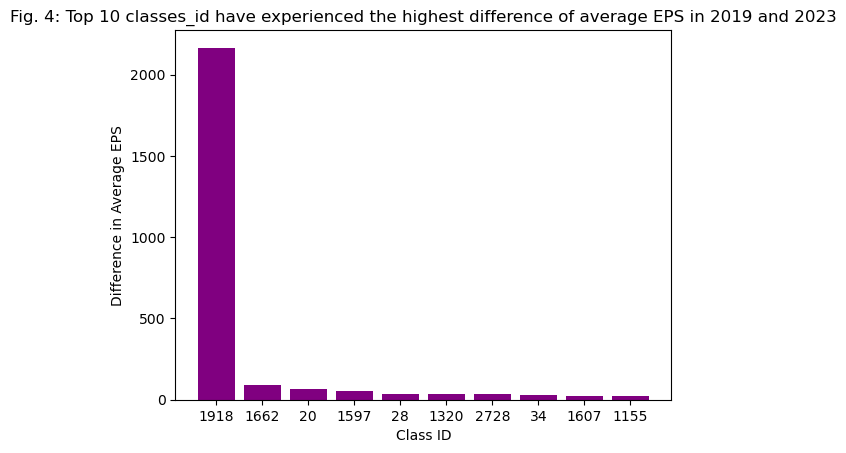

In [39]:
import matplotlib.pyplot as plt

# Data
class_id = ['1918', '1662', '20', '1597', '28', '1320', '2728', '34', '1607', '1155']
diff_avg_eps = [2165.54, 90.09, 65.34, 52.63, 35.17, 34.85, 33.55, 29.39, 24.52, 24.51]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot data
ax.bar(class_id, diff_avg_eps, color='purple')

# Set the title and labels
ax.set_title('Fig. 4: Top 10 classes_id have experienced the highest difference of average EPS in 2019 and 2023')
ax.set_xlabel('Class ID')
ax.set_ylabel('Difference in Average EPS')

# Display the plot
plt.show()


##### Promotional Impact:
Examine the impact of promotions, discounts, and other pricing strategies over time.
In the current phase, we don’t have access to the promotional data to analyse such impact. **Comparative Analysis** would be useful to compare sales and profits before, during, and after promotions.
##### Customer Demographics and Preferences:
Study changes in customer demographics and preferences to understand if there is a shift towards cheaper or different types of services.

- **Customer Demographics and Preferences:**
  - Study changes in customer demographics and preferences to understand if there is a shift towards cheaper or different types of services.

```sql
WITH avg_eps AS (
    SELECT 
        country_id,
        ROUND(AVG(CASE WHEN year = 2019 THEN eps END), 2) AS avg_eps_2019,
        ROUND(AVG(CASE WHEN year = 2023 THEN eps END), 2) AS avg_eps_2023
    FROM (
        SELECT
            EXTRACT(YEAR FROM paidon_date) AS year,
            country_id,
            total_usd / seats AS eps
        FROM 
            analytic_test_booking
        WHERE
            EXTRACT(YEAR FROM paidon_date) IS NOT NULL
    ) AS subquery
    WHERE
        year IN (2019, 2023)
    GROUP BY 
        country_id
)
SELECT 
    country_id,
    avg_eps_2019,
    avg_eps_2023,
    ROUND((avg_eps_2019 - avg_eps_2023), 2) AS diff_avg_eps
FROM 
    avg_eps
WHERE 
    avg_eps_2019 IS NOT NULL 
    AND avg_eps_2023 IS NOT NULL
ORDER BY 
    diff_avg_eps DESC
LIMIT 10;

```

Table 6: Top 10 countries with extreme drop in average EPS comparing 2019 and 2023.


| country_id | avg_eps_2019 | avg_eps_2023 | diff_avg_eps |
| ---------- | ------------ | ------------ | ------------ |
| AZ         | 57.27        | 11.83        | 45.44        |
| LR         | 46.08        | 8.00         | 38.08        |
| ZM         | 56.47        | 23.24        | 33.23        |
| ME         | 39.41        | 12.26        | 27.15        |
| PY         | 34.93        | 12.18        | 22.75        |
| GT         | 37.07        | 16.14        | 20.93        |
| CV         | 33.22        | 13.18        | 20.04        |
| CR         | 35.28        | 16.57        | 18.71        |
| SV         | 28.64        | 10.76        | 17.88        |
| CK         | 27.80        | 10.27        | 17.53        |


In [46]:
pip install squarify


Note: you may need to restart the kernel to use updated packages.


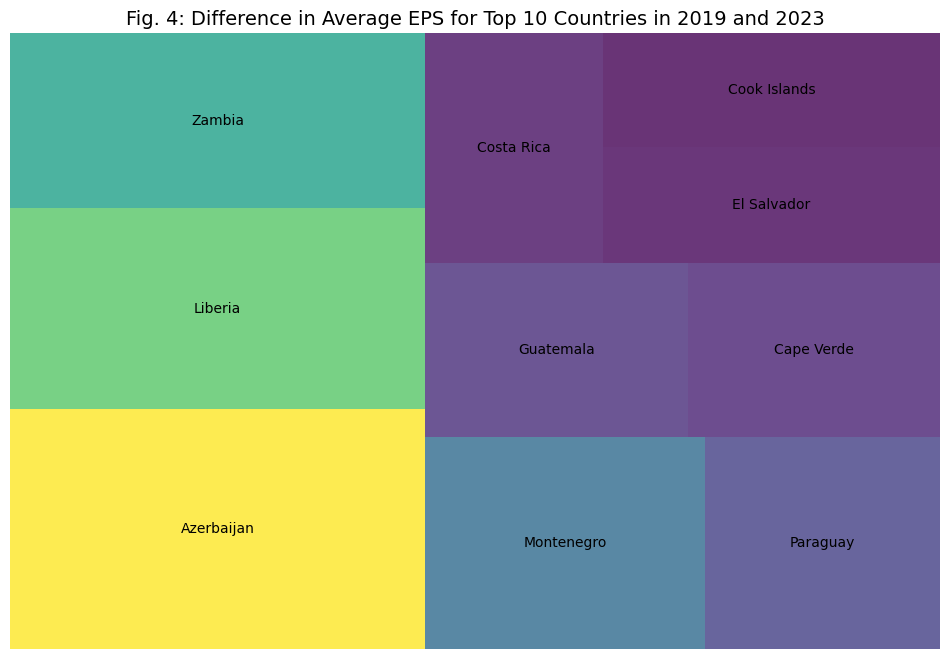

In [48]:
import matplotlib.pyplot as plt
import squarify

# Data
country_id = ["Azerbaijan", "Liberia", "Zambia", "Montenegro", "Paraguay", "Guatemala", "Cape Verde", "Costa Rica", "El Salvador", "Cook Islands"]
diff_avg_eps = [45.44, 38.08, 33.23, 27.15, 22.75, 20.93, 20.04, 18.71, 17.88, 17.53]

# Create a color palette
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(min(diff_avg_eps), max(diff_avg_eps))
colors = [cmap(norm(value)) for value in diff_avg_eps]

# Create the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Plot tree map
squarify.plot(sizes=diff_avg_eps, label=country_id, color=colors, alpha=0.8, ax=ax)

# Set the title
plt.title('Fig. 4: Difference in Average EPS for Top 10 Countries in 2019 and 2023', fontsize=14)

# Remove axis
plt.axis('off')

# Display the plot
plt.show()


## Hypotheses and Recommendations
Based on the provided data schema and the identified drop in Eran per Seat (EPS) between 2019 and 2023, here are three hypotheses and recommendations for increasing sales and revenue, ranked by business value:


### 1. Optimise Pricing Strategy (High Business Value)
**Hypothesis**: Adjusting the pricing strategy to reflect market demand and competitive positioning can enhance revenue per seat.

**Recommendations**:
- **Dynamic Pricing**: Implement dynamic pricing models that adjust ticket prices based on factors such as demand, time to departure, and competition. For instance, increase prices during peak travel times and offer discounts during off-peak times.
- **Segmentation**: Offer different pricing tiers based on customer segments, such as economy, business, and premium seats, to cater to varying customer preferences and willingness to pay.
- **Promotions and Discounts**: Run targeted promotions and discounts for specific routes or times that typically experience lower occupancy to increase seat utility land overall business performance.
The analysis below provides some insights from 2023 (Q1, Q2, Q3) that might be considered while implementing the new models of pricing.

The analysis below provides some insights from 2023 (Q1, Q2, Q3) that might be considered while implementing the new models of pricing.

**! Important**:

- **Statistical significance** needs to be tested to ensure these differences have not occurred by chance.
- The statistics include the date and time that have been implemented based on paidon_date. That may imply the purchase date and time, not the real travel time.

#### KIPs for dynamic pricing strategy

Identifying the Top 10 percentages of Seat demand per month 2023.

```sql
SELECT 
    month,
    total_seats,
    ROUND((total_seats / total_seats_sum) * 100, 2) AS percentage_of_total_seats
FROM (
    SELECT 
        DATE_FORMAT(paidon_date, '%Y-%m') AS month,
        SUM(seats) AS total_seats
    FROM 
        analytic_test_booking
    WHERE 
        YEAR(paidon_date) = 2023
        AND MONTH(paidon_date) BETWEEN 1 AND 9
    GROUP BY 
        DATE_FORMAT(paidon_date, '%Y-%m')
) AS monthly_seats
JOIN (
    SELECT 
        SUM(seats) AS total_seats_sum
    FROM 
        analytic_test_booking
    WHERE 
        YEAR(paidon_date) = 2023
        AND MONTH(paidon_date) BETWEEN 1 AND 9
) AS total_seats_info
ON 1=1
ORDER BY 
    total_seats DESC;
    
    ```
    

Table 7: Top 10 Seat demand(%) per month 2023.


| month    | total_seats | percentage_of_total_seats |
| -------- | ----------- | ------------------------ |
| 2023-03  | 393919      | 12.55                    |
| 2023-08  | 367654      | 11.71                    |
| 2023-04  | 363668      | 11.58                    |
| 2023-07  | 360831      | 11.49                    |
| 2023-02  | 359459      | 11.45                    |
| 2023-01  | 355358      | 11.32                    |
| 2023-09  | 330456      | 10.53                    |
| 2023-05  | 321813      | 10.25                    |
| 2023-06  | 285993      | 9.11                     |


**March** and **August** have relatively higher percentages of seat demand compared with other months.

Seat demand per day of the week (Q1, Q2, Q3) 2023.

``` sql
SELECT 
    DAYNAME(paidon_date) AS day_of_week,
    SUM(seats) AS total_seats,
    ROUND(SUM(seats) * 100.0 / (SELECT SUM(seats) FROM analytic_test_booking WHERE YEAR(paidon_date) = 2023 AND MONTH(paidon_date) BETWEEN 1 AND 9), 2) AS percentage_of_total_seats
FROM 
    analytic_test_booking
WHERE 
    YEAR(paidon_date) = 2023
    AND MONTH(paidon_date) BETWEEN 1 AND 9
GROUP BY 
    DAYNAME(paidon_date)
ORDER BY 
    total_seats DESC;
```

Table 8: Seat demand per day of the week (Q1, Q2, Q3) 2023.

| day_of_week | total_seats | percentage_of_total_seats |
| ----------- | ----------- | ------------------------ |
| Monday      | 465775      | 14.84                    |
| Sunday      | 459947      | 14.65                    |
| Wednesday   | 452813      | 14.42                    |
| Thursday    | 451270      | 14.38                    |
| Tuesday     | 450957      | 14.37                    |
| Friday      | 433300      | 13.80                    |
| Saturday    | 425089      | 13.54                    |


**Monday** and **Sunday** have relatively higher percentages of seat demand compared with other days of the week (2023).

Calculating seat demand per hour of the day (Q1, Q2, Q3) 2023

```sql
SELECT 
    DATE_FORMAT(paidon, '%H:00') AS hour_of_day,
    SUM(seats) AS total_seats
FROM 
    analytic_test_booking
WHERE 
    YEAR(paidon_date) = 2023
GROUP BY 
    DATE_FORMAT(paidon, '%H:00')
ORDER BY 
    total_seats DESC
LIMIT 10;

```

Table 9: Seat demand per hour of the day (Q1, Q2, Q3) 2023.

| hour_of_day | total_seats | percentage_of_total_seats |
| ----------- | ----------- | ------------------------ |
| 21:00       | 194896      | 6.21                     |
| 20:00       | 193091      | 6.15                     |
| 18:00       | 192144      | 6.12                     |
| 19:00       | 191879      | 6.11                     |
| 17:00       | 189104      | 6.02                     |
| 16:00       | 176834      | 5.63                     |
| 22:00       | 176319      | 5.62                     |
| 15:00       | 164419      | 5.24                     |
| 12:00       | 163178      | 5.20                     |
| 11:00       | 163087      | 5.20                     |


The hours 21:00 and 20:00 are the most relevant time for booking.

#### KIPs for dynamic segmentation strategy

The SQL query below, can be used to identify the Top 10 of many variables in relation with the Total revenue generated in (q1, Q2, Q3) 2023

```sql
SELECT 
     -- country_id,
    -- seller_id,
     class_id,
     -- cust_id,
     -- user_agent,
     -- createdby,
     -- landing,
    round(SUM(total_usd), 2) AS total_usd,
    round ((SUM(total_usd) / (SELECT SUM(total_usd) FROM analytic_test_booking where YEAR(paidon_date) = 2023) * 100), 2) AS percentage_of_total
FROM 
    analytic_test_booking
where Year(paidon_date) = 2023
GROUP BY 
    -- country_id
    -- seller_id
      class_id
     -- cust_id
     -- user_agent,
     -- createdby
     -- landing
ORDER BY 
    total_usd DESC
LIMIT 10;

```

Table 10: Top 10 classes in terms of Total revenue generated in (q1, Q2, Q3) 2023. 

| class_id | total_usd    | percentage_of_total |
| -------- | ------------ | ------------------- |
| 43       | 5538807.74   | 13.56               |
| 21       | 5117352.51   | 12.53               |
| 12       | 2359512.50   | 5.78                |
| 6        | 1927556.58   | 4.72                |
| 11       | 1423242.72   | 3.48                |
| 79       | 1259985.51   | 3.08                |
| 44       | 1161400.66   | 2.84                |
| 5        | 874532.66    | 2.14                |
| 1776     | 684805.19    | 1.68                |
| 3473     | 630651.15    | 1.54                |


Table 11: Top 10 countries in terms of Total revenue generated in (q1, Q2, Q3) 2023. 


| country_id | total_usd    | percentage_of_total_usd |
| ---------- | ------------ | ------------------- |
| TH         | 12816936.12  | 31.37               |
| VN         | 3371532.33   | 8.25                |
| ID         | 2355387.43   | 5.77                |
| SG         | 2042309.39   | 5.00                |
| FR         | 1744735.92   | 4.27                |
| PH         | 1695213.63   | 4.15                |
| DE         | 1680660.19   | 4.11                |
| GB         | 1613003.69   | 3.95                |
| NL         | 1436204.64   | 3.52                |
| US         | 1327477.10   | 3.25                |


### 2. Enhance Marketing and Customer Acquisition Strategies (Medium to High Business Value)
**Hypothesis**: Improved marketing and targeted customer acquisition strategies can increase overall sales volume and revenue.

**Recommendations**:
- **Targeted Advertising**: Utilise data analytics to identify high-value customer segments and create targeted advertising campaigns through digital marketing channels, including social media, search engines, and email marketing.

#### KIPs for Enhancing Marketing and Customer Acquisition

Table 11 : Top 10 countries in terms of Total revenue generated in (q1, Q2, Q3) 2023, can be used for this purpose.

- **Loyalty Programs**: Develop and promote loyalty programs to encourage repeat bookings. Offer points or discounts for frequent travellers, which can increase customer retention and lifetime value.
Validating KPIs


Table 13: Top 10 countries in terms of Total revenue generated in (q1, Q2, Q3) 2023.

| seller_id | total_usd    | percentage_of_total_usd |
| --------- | ------------ | ------------------- |
| 2547      | 3573473.40   | 8.75                |
| 16        | 2450293.31   | 6.00                |
| 191       | 1738954.53   | 4.26                |
| 2810      | 1458379.19   | 3.57                |
| 2356      | 1326626.45   | 3.25                |
| 269       | 1224183.98   | 3.00                |
| 181       | 1164656.65   | 2.85                |
| 2382      | 1117873.07   | 2.74                |
| 527       | 1014406.70   | 2.48                |
| 2548      | 961400.48    | 2.35                |


- **Partnerships**: Partner with travel agencies, corporate clients, and other relevant businesses to offer bundled deals and increase sales through their networks.

Table 14: Top agents/partners in terms of Total revenue generated in (q1, Q2, Q3) 2023.

| createdby | total_usd    | percentage_of_total |
| --------- | ------------ | ------------------- |
| 1         | 13102713.04  | 32.07               |
| 4         | 12961968.52  | 31.73               |
| 30        | 3535039.23   | 8.65                |
| 3481      | 1363260.13   | 3.34                |
| 6795      | 1125172.30   | 2.75                |
| 4087482   | 867932.77    | 2.12                |
| 64932     | 620355.82    | 1.52                |
| 56330     | 567092.21    | 1.39                |
| 20092     | 453332.18    | 1.11                |
| 26        | 452194.42    | 1.11                |


### 3. **Improve Customer Experience and Service Offerings (Medium Business Value)**
   **Hypothesis:** Enhancing the overall customer experience and expanding service offerings can lead to increased customer satisfaction, repeat business, and higher revenue per seat.
   
   **Recommendations:**
   - **Customer Feedback:** Regularly gather and analyze customer feedback to identify areas for improvement. Implement changes based on this feedback to enhance the overall travel experience.
   - **Additional Services:** Introduce value-added services such as in-transit entertainment, Wi-Fi, meal options, and comfortable seating arrangements. Offer these as premium services to increase revenue per seat.
   - **Ease of Booking:** Simplify the booking process on the website and mobile apps. Ensure a user-friendly interface and offer multiple payment options to cater to a broader audience.

#### KIPs for Improve Customer Experience and Service Offerings


Table 15: Top user agents have been used based on Total revenue generated in (q1, Q2, Q3) 2023.

| user_agent                                                                                                                           | total_usd    | percentage_of_total |
| ------------------------------------------------------------------------------------------------------------------------------------- | ------------ | ------------------- |
| Mozilla/5.0 (iPhone; CPU iPhone OS 16_3_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.3 Mobile/15E148 Safari/604.1 | 1704113.63   | 4.17                |
| Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Mobile/15E148 Safari/604.1 | 1634761.94   | 4.00                |
| Mozilla/5.0 (iPhone; CPU iPhone OS 16_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.2 Mobile/15E148 Safari/604.1 | 1409454.39   | 3.45                |
| Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36 | 1073609.31   | 2.63                |
| api/booking                                                                                                                            | 986779.28    | 2.42                |
| Mozilla/5.0 (iPhone; CPU iPhone OS 16_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.6 Mobile/15E148 Safari/604.1 | 866719.39    | 2.12                |
| Mozilla/5.0 (Linux; Android 10; K) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Mobile Safari/537.36 | 811358.62    | 1.99                |
| Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36 | 803600.83    | 1.97                |
| Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.6.1 Mobile/15E148 Safari/604.1 | 777711.98    | 1.90                |
| Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36 | 703656.87    | 1.72                |


Table 16: Top landing page performance in terms of Total revenue generated in (q1, Q2, Q3) 2023.


| landing                                   | total_usd    | percentage_of_total |
| ----------------------------------------- | ------------ | ------------------- |
| https://12go.asia/                       | 2678038.17   | 6.56                |
| https://www.12go.asia/en                  | 2600910.67   | 6.37                |
| https://12go.asia/en                      | 1850652.39   | 4.53                |
| https://12go.co/                         | 1206299.24   | 2.95                |
| https://www.12go.co/en                    | 667756.03    | 1.63                |
| https://12go.asia/fr                      | 333007.60    | 0.82                |
| https://secure.12go.asia/en/login         | 330881.29    | 0.81                |
| https://12go.asia/de                      | 327467.61    | 0.80                |
| https://www.12go.asia/de                  | 320521.65    | 0.78                |
| https://www.12go.asia/fr                  | 280009.97    | 0.69                |


### Data-Driven Approach:
To validate these hypotheses and implement the recommendations effectively, consider the following steps:

1. **Data Analysis:** Conduct detailed data analysis to understand customer behavior, booking patterns, and price sensitivity. Use historical data from 2019 and 2023 to identify trends and insights.
2. **A/B Testing:** Implement A/B testing for dynamic pricing models, marketing campaigns, and service enhancements to measure their impact on sales and revenue.
3. **Customer Surveys:** Perform surveys and gather qualitative data to supplement quantitative analysis. This can provide deeper insights into customer preferences and satisfaction levels.

By implementing these hypotheses and recommendations, the company can potentially increase its sales and revenue, thereby improving the Eran per Seat (eps) and overall business performance.

## Limitations

- Due to time constraints, this analysis is a preliminary examination of the data. Further validation, statistical analysis, hypothesis testing, and expansion of the analysis by including more variables in the current dataset or others when possible are needed. 
- Gaining a deeper understanding of the business case and scope will provide more depth to the analysis, which wasn't possible within the given time frame.